# To What Extent Does House Value Correlate with Income Level, Number of Rooms, House Age and Location?

# Project 1

## Introduction

Housing market is always a hot topic because buying a house is one of the most significant financial and lifestyle decision individuals and families make. In the realm of real estate economics and housing market analysis, understanding the multifaceted determinants of property values is of paramount importance. There are numerous elements can impact the valuation of residential properties, such as their location, dimensions and condition. Previous studies on the real estate market using machine learning approaches can be categorized into two groups: the trend forecasting of house price index, and house price valuation. Literature review indicates that studies in the former category deem predominant. Several researchers attempted to build a model to accurately predict housing prices with high accuracy and minimal error. According to the paper by Manjula et al. (2017), these models are created based on various characteristics, such as the square footage of the house, number of bedrooms, ambience, and more.[1] Li Li and Kai-Hsuan Chuet has studied real estate price variation makes the behavior complex, non-linear and with some uncertainty.[2] The realm of residential real estate is a dynamic and multifaceted domain, characterized by a complex interplay of various factors that collectively influence the value of houses. All of these things combined make it hard to accurately predict how much a house will cost, especially when we want to consider all the different things that influence its value. Most real estate businesses probably have loads of different features to choose from, but one of the disadvantages of having a large number of features is the heavy computation involved in making regression models and finding appropriate solutions. Therefore, the choice of predictor variables is particularly important for house price prediction. In my research, my goal is to build a regression model and use machine learning techniques to investigate the relationship between house value and income level, number of rooms, house age and location.

My variable selection is based on the paper by Dennis R. Capozza, Patric H. Hendershott, Charlotte Mack, and Christopher J. Mayer that examines the determinants of house price dynamics.[3] Their work shed light on fundamental factors that influence housing prices, emphasizing key variables like income, area size, and construction costs. Income levels are widely recognized as a primary driver of housing demand, with higher incomes affording individuals the capacity to purchase larger, more expensive homes. Similarly, the size of the living space, plays a significant role in price determination, as larger homes often command higher prices. Construction costs are a vital consideration, reflecting the expense associated with building or renovating homes. While they focused on the important factors such as income, area size and construction costs, etc., I added the house age and location as determinants to make the analysis more comprehensive. For example, whether the house is proximate to ocean can influence the house value, because some people prefer the beautiful seaside scenery, while others may think living inland is more convenient and livelier. Through this analysis, I can find out how it affects house value and depict the relationship between them. Therefore, here comes my research question: How do different factors, including income levels within an area, number of rooms, the age and location of housing units collectively contribute to shaping the housing market and influencing house values?

My primary source of the data comes from the California Housing dataset on Kaggle, which contains different house related attributes for properties located in California. In this research, I also merged the US Census dataset and Poverty Rate dataset to complement my data. I've selected four independent variables from the California Housing dataset that have an impact on housing prices: median income, total rooms, housing median age and ocean proximity. These variables play a significant role in determining how much a house is worth. In addition. I used other factors such as poverty rate to help provide more visualizations and better investigate my research question. The main goal of this project is to uncover the extent to which these factors influence the value of homes, ultimately enabling us to enhance the accuracy of our predictions. High-dimensional data in housing price datasets is very common [4], which affects the prediction process and makes it difficult to analyze because too many features need to be considered when building a prediction model [5]. To reduce the dimensionality, the data is mapped to a lower dimensional space by removing uninformative and non-significant data variance. This is an important reason why most housing price data sets use regression algorithms instead of classification algorithms for prediction [6]. Also, the fewer features, the simpler the model and the easier to understand the results. Overall, feature selection methods can be broadly classified into three types: wrapper methods, embedding methods, and filter methods. Therefore, by performing feature selection on housing price data, the number of experiments required to predict housing prices can be reduced, thereby saving time and money for real estate agencies.

The choice of these specific factors for investigation is guided by their significance within the real estate landscape. Income levels within a region reflect the economic capacity of its residents and their propensity to invest in property. The number of rooms in a housing unit speaks to its spatial utility and functionality, often serving as a key driver of demand. The age of housing units underscores the tension between historical value and modern amenities, while proximity to the ocean introduces the allure of scenic landscapes and potential recreational opportunities. Through this study, I aim to enhance the understanding of housing market dynamics and provide practical insights. In recent years, due to the growing trend towards Big Data, machine learning has become a vital prediction approach because it can predict house prices more accurately based on their attributes, regardless of the data from previous years. Machine learning has been applied in disciplines such as business, computer engineering, industrial engineering, bioinformatics, medicine, pharmaceuticals, physics, and statistics to gather knowledge and predict future events. With the recent growth in the real estate market, machine learning can play an important role in predicting property prices. In subsequent parts of this study, I will delve into data collection and analysis, plotting graphs and maps, constructing regression and machine learning models, and presentation of findings, which together contribute to a comprehensive exploration of the research question. Through this endeavor, I aspire to contribute meaningful insights into the residential real estate sector and its wider societal impact.

## Data Cleaning/Loading

In [2]:
# !pip install pandas
import pandas as pd
df = pd.read_csv('housing.csv')  

My research question is: To what extent does house value correlate with income level, number of rooms, house age and location?

I imported the California housing dataset and selected the variables related to my research question. The X variables are median_income, total_rooms, housing_median_age, and ocean_proximity, representing a district's income, number of rooms, age of housing units, and distance from the ocean, respectively. The Y variable median_house_value stands for house value, and the aim of the reaserch is to investigate how these X variables affect the Y variable.

Income represents the financial well-being of residents in a given area. Higher income levels often indicate a higher purchasing power and willingness to invest in more expensive homes. Number of rooms directly affect the functional space available to occupants. More rooms generally indicate larger properties, which are often associated with higher property values due to increased livable space. Housing age reflects the architectural character of the neighborhood. Newer housing may attract higher prices due to modern amenities and designs, while older properties might have historical significance, unique architectural features, or require renovations, all of which can influence their value. The distance of a property from the ocean is an essential factor as it relates to its geographical location and the associated benefits and drawbacks. Properties closer to the ocean typically offer picturesque views and a desirable lifestyle. However, potential risks such as weather-related hazards may also impact their value. All of these selected X variables collectively have an influence on the Y variable (median house value).

## Summary Statistics Tables

In [3]:
summary_stats = df.describe()
summary_stats

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The summary statistics table contains information pertaining to housing characteristics and demographics in a specific geographical area. It encompasses essential attributes such as longitude and latitude coordinates, providing the precise location of housing units. Median housing age offers insights into the age distribution of properties, while variables like total rooms and total bedrooms indicate the sizes and bedroom counts of housing units. Population and households data help gauge population density and housing demand, while median income stands as a crucial socioeconomic metric with potential implications for housing prices. Lastly, median house value, serving as a central variable, offers a snapshot of property values in the area. The table provides a comprehensive understanding of key variables in our research. The mean median income of approximately 3.87 tens of thousands of US Dollars signifies the average income level within the region, while the standard deviation of about 1.90 tens of thousands of US Dollars indicates the extent of income variability. Housing units, on average, consist of around 2635.76 total rooms, with a substantial standard deviation of 2181.62, suggesting a wide range of housing sizes. The median age of housing units at 28.64 years illustrates the age distribution, with a standard deviation of 12.59 years, implying diverse property ages. The median house value of approximately 206,855.82 dollars serves as our research target, displaying both central tendency and substantial variability with a standard deviation of 115,395.62 dollars. These statistics provide an understanding of the housing landscape, guiding our exploration of relationships between income, housing size, age, and value. As we delve into our analysis, these insights will inform strategies for addressing property valuation and policy implications in the residential property market.

In [4]:
sum_median_income = df["median_income"].sum()
sum_total_rooms = df["total_rooms"].sum()
sum_housing_median_age = df["housing_median_age"].sum()
sum_median_house_value = df["median_house_value"].sum()
sums_df = pd.DataFrame({
    "Column Name": ["Median Income", "Total Rooms", "Housing Median Age", "Median House Value"],
    "Sum": [sum_median_income, sum_total_rooms, sum_housing_median_age, sum_median_house_value]
})
print(sums_df)

          Column Name           Sum
0       Median Income  7.989065e+04
1         Total Rooms  5.440215e+07
2  Housing Median Age  5.911190e+05
3  Median House Value  4.269504e+09


The cumulative values provide a holistic perspective on the dataset. The sums of the key variables in the dataset offer valuable insights into the economic and housing characteristics of the area under study. The sum of median income, expressed in scientific notation as 7.99e+04, represents the total income of households in the dataset and can be indicative of the income distribution among households within the area. In contrast, the sum of total rooms, a substantial 5.44e+07, signifies the cumulative number of rooms across all housing units, providing insights into housing capacity and size in the region. The sum of housing median age, while in scientific notation as 5.91e+05, reflects the combined median ages of housing units, aiding in understanding the aging patterns of properties. Lastly, the sum of median house values, 4.27e+09, signifies the total value of owner-occupied housing units and serves as a vital metric for assessing the overall property values within the area. These aggregated values serve as an initial foundation for analyzing the economic and housing landscape and can guide further research to explore relationships and patterns related to real estate economics and housing market dynamics.

In [5]:
ocean_proximity_counts = df["ocean_proximity"].value_counts()
ocean_proximity_summary_df = pd.DataFrame({
    "Ocean Proximity": ocean_proximity_counts.index,
    "Count": ocean_proximity_counts.values
})
print("\nOcean Proximity Summary:")
print(ocean_proximity_summary_df)


Ocean Proximity Summary:
  Ocean Proximity  Count
0       <1H OCEAN   9136
1          INLAND   6551
2      NEAR OCEAN   2658
3        NEAR BAY   2290
4          ISLAND      5


The "Ocean Proximity Summary" offers insights into the geographical distribution of housing units in relation to their proximity to the ocean, a critical factor influencing housing prices. With the highest count, "<1H OCEAN" signifies a substantial presence of properties in coastal or seaside areas, while "INLAND" suggests diversity in housing locations. "NEAR OCEAN" and "NEAR BAY" categories indicate significant numbers of units near the ocean or bay regions. In contrast, "ISLAND" has the lowest count, signifying limited residential development on islands. This summary plays a pivotal role in understanding the spatial context of the research area, laying the foundation for investigations into how ocean proximity, among other factors, relates to median house values. 

## Plots, Histograms, Figures

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
color = 'black' 

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='median_income', bins=20, kde=True, color=color)
plt.title('Histogram of Median Income')

plt.subplot(2, 2, 2)
sns.histplot(data=df, x='total_rooms', bins=20, kde=True, color=color)
plt.title('Histogram of Total Rooms')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='housing_median_age', bins=20, kde=True, color=color)
plt.title('Histogram of Housing Median Age')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='median_house_value', bins=20, kde=True, color=color)
plt.title('Histogram of Median House Value')

plt.tight_layout()
plt.show()

I selected variables median_income, total_rooms, housing_median_age, median_house_value and plotted histograms to find out their distribution and gain preliminary insights into the relationships between them to help solve the research question. The histogram depicting median income reveals a right-skewed distribution, indicating a concentration of households within lower to moderate income ranges. This suggests that the region accommodates a diverse mix of income levels, potentially influencing the affordability landscape. The histogram for total rooms displays a roughly symmetric distribution, suggesting a wide variation in housing sizes. The presence of a few properties with a very high number of rooms may contribute to the distribution's right tail. The housing median age histogram displays a relatively uniform distribution, indicating an even representation of properties across different age groups. This balanced distribution may signify a diverse inventory of housing options appealing to a broad range of potential buyers. Lastly, the histogram of median house value shows a right-skewed distribution. This suggests that a significant portion of houses has values in the lower to mid-range. It also demonstrates an anomalous peak around its maximum value of approximately 500k. This peak could signify an outlier within the dataset. These insights from the histograms form initial indicators of potential relationships and trends within the housing market.

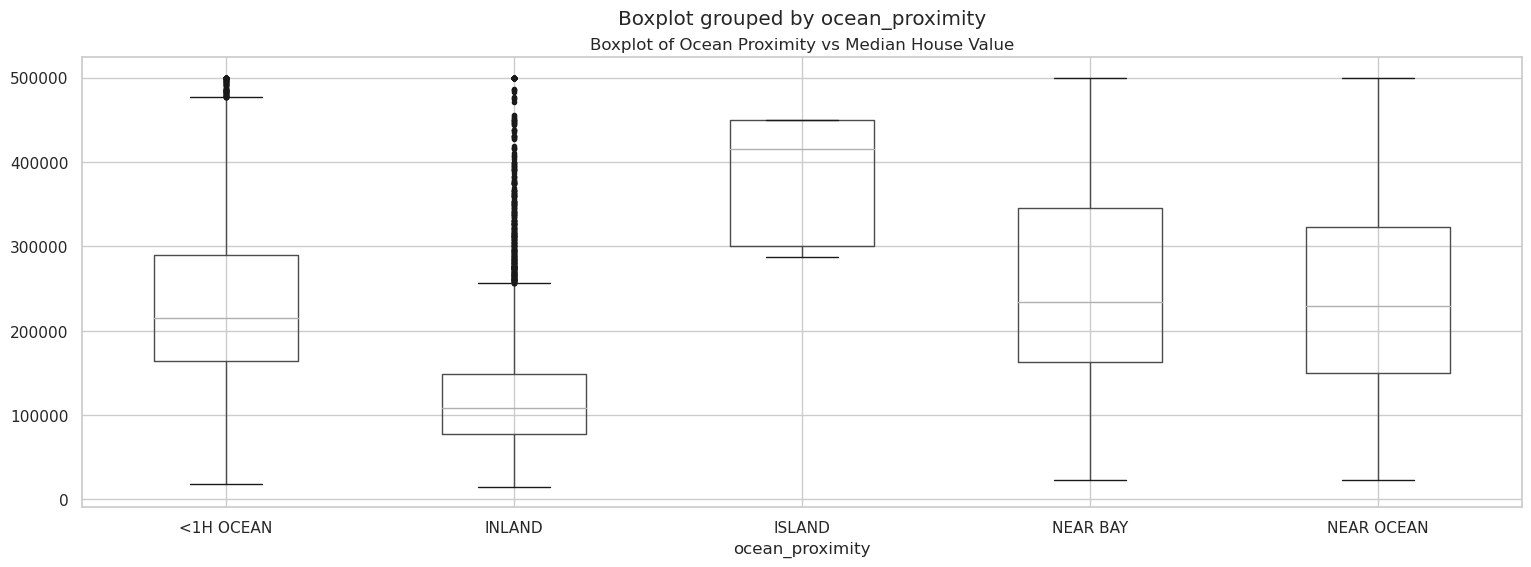

In [6]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot of Ocean Proximity vs Median House Value')
plt.show()

I plotted the boxplot of ocean_proximity versus median_house_value to study their relationship. The boxplot reveals distinct variations in median house values based on different categories of ocean proximity. Properties classified as "NEAR BAY" and "NEAR OCEAN" tend to have higher median house values compared to those designated as "INLAND" or "<1H OCEAN." This suggests that houses located in close proximity to the ocean generally command higher prices, potentially due to factors such as desirable views, recreational opportunities, and overall attractiveness. The "INLAND" category showcases a lower median house value range and a comparatively smaller spread. This suggests that properties located further from the coast are generally more affordable. The high median house value for the "ISLAND" category suggests that properties located on islands command premium prices. This could be due to the exclusivity and unique features. The boxplot highlights the intrinsic relationship between location and housing prices and provides a valuable foundation for further investigation and analysis.

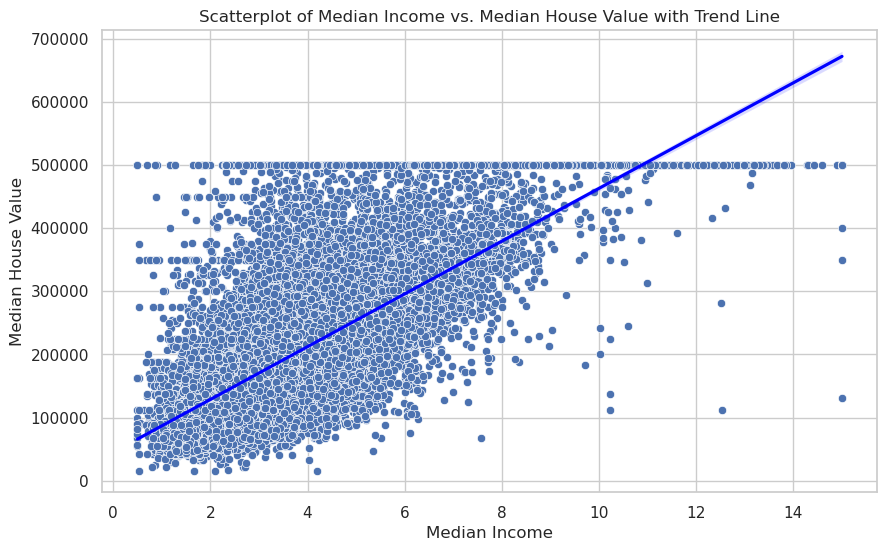

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value')
sns.regplot(data=df, x='median_income', y='median_house_value', scatter=False, color='blue')
plt.title('Scatterplot of Median Income vs. Median House Value with Trend Line')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

The scatterplot illustrates the connection between median income and median house value, revealing a discernible positive correlation between the two variables. As median income increases, there is a corresponding trend of higher median house values. However, the plot also highlights variability, indicating that income alone does not entirely account for variations in housing prices. Notable outliers suggest the presence of unique factors influencing certain property values. This scatterplot significantly pertains to the research question concerning housing price determinants. It serves as a foundational visual exploration of how income levels relate to housing values, underscoring the role of income as a potential predictor.

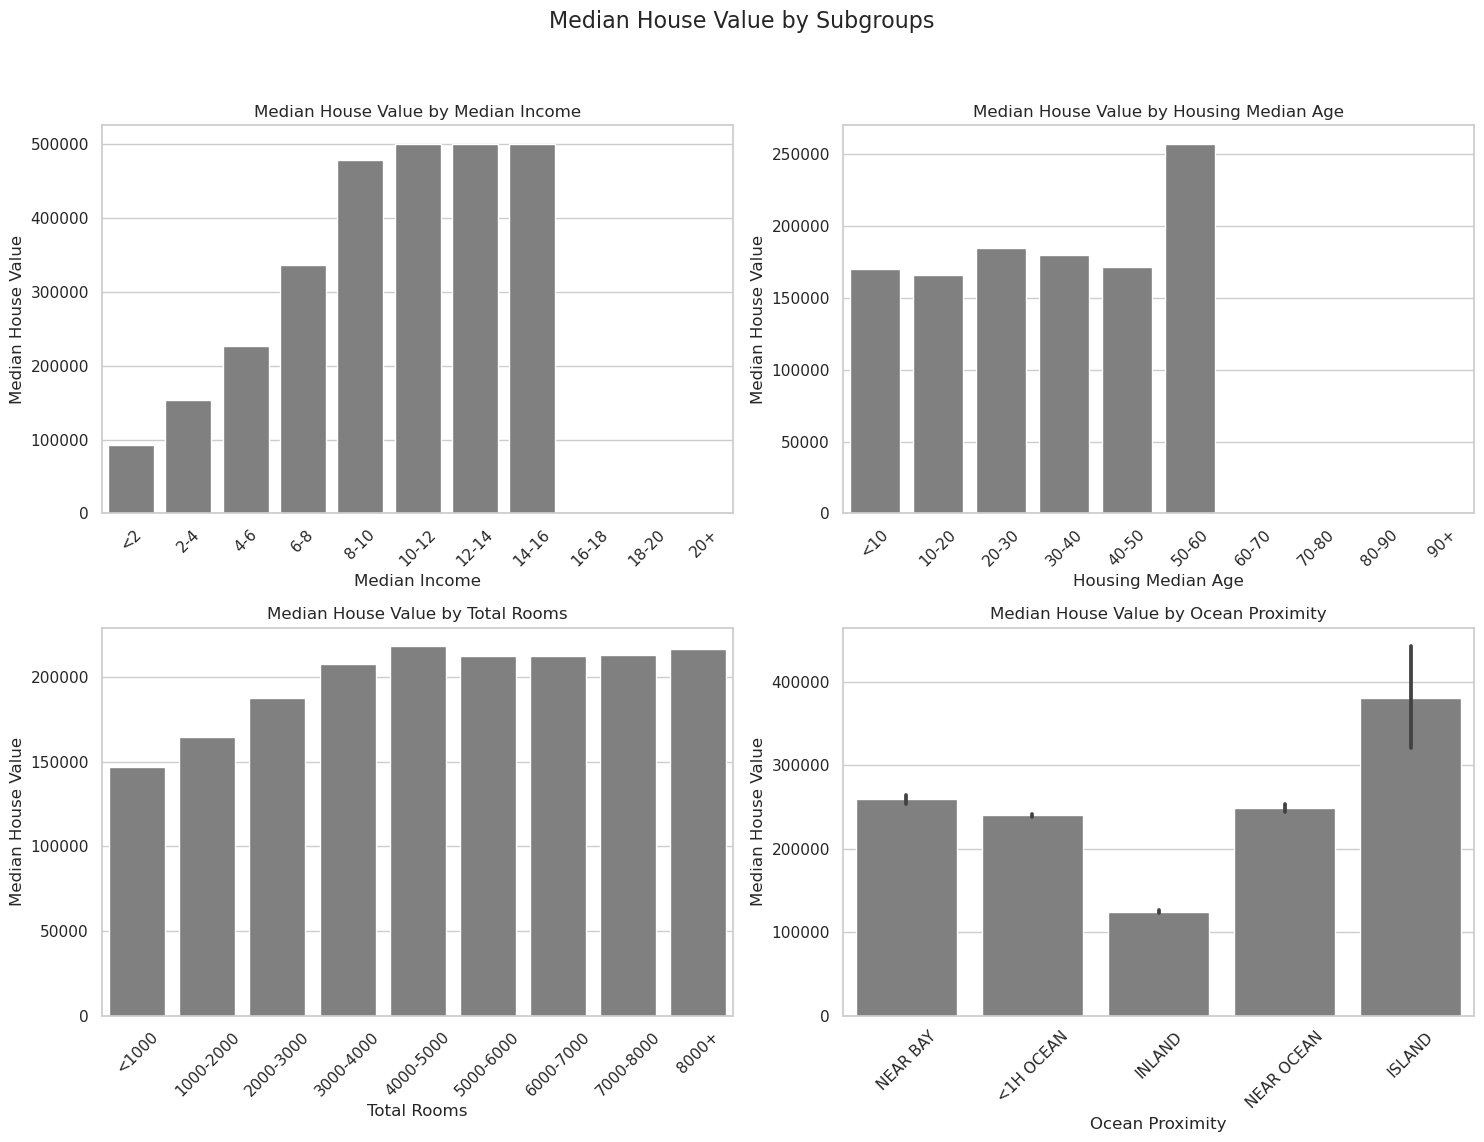

In [8]:
import matplotlib.cm as cm

income_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, float("inf")]
income_labels = ["<2", "2-4", "4-6", "6-8", "8-10", "10-12", "12-14", "14-16", "16-18", "18-20", "20+"]

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, float("inf")]
age_labels = ["<10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90+"]

rooms_bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, float("inf")]
rooms_labels = ["<1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000-6000", "6000-7000", "7000-8000", "8000+"]

df["median_income_bin"] = pd.cut(df["median_income"], bins=income_bins, labels=income_labels)
df["housing_age_bin"] = pd.cut(df["housing_median_age"], bins=age_bins, labels=age_labels)
df["total_rooms_bin"] = pd.cut(df["total_rooms"], bins=rooms_bins, labels=rooms_labels)

grouped_income = df.groupby("median_income_bin")["median_house_value"].median()
grouped_age = df.groupby("housing_age_bin")["median_house_value"].median()
grouped_rooms = df.groupby("total_rooms_bin")["median_house_value"].median()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Median House Value by Subgroups", fontsize=16)
cmap = cm.get_cmap("gray")

sns.barplot(x=grouped_income.index, y=grouped_income.values, ax=axes[0, 0], color=cmap(0.5))
axes[0, 0].set_title("Median House Value by Median Income")
axes[0, 0].set_xlabel("Median Income")
axes[0, 0].set_ylabel("Median House Value")
axes[0, 0].set_xticklabels(labels=grouped_income.index, rotation=45)

sns.barplot(x=grouped_age.index, y=grouped_age.values, ax=axes[0, 1], color=cmap(0.5))
axes[0, 1].set_title("Median House Value by Housing Median Age")
axes[0, 1].set_xlabel("Housing Median Age")
axes[0, 1].set_ylabel("Median House Value")
axes[0, 1].set_xticklabels(labels=grouped_age.index, rotation=45)

sns.barplot(x=grouped_rooms.index, y=grouped_rooms.values, ax=axes[1, 0], color=cmap(0.5))
axes[1, 0].set_title("Median House Value by Total Rooms")
axes[1, 0].set_xlabel("Total Rooms")
axes[1, 0].set_ylabel("Median House Value")
axes[1, 0].set_xticklabels(labels=grouped_rooms.index, rotation=45)

sns.barplot(data=df, x='ocean_proximity', y='median_house_value', palette=[cmap(0.5)], ax=axes[1, 1])
axes[1, 1].set_title("Median House Value by Ocean Proximity")
axes[1, 1].set_xlabel("Ocean Proximity")
axes[1, 1].set_ylabel("Median House Value")
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

I used Groupby to better explain the X variables' correlation with the outcome. The grouped bar plots offer insightful analyses of the relationships between median income, housing median age, total rooms, ocean proximity and median house values. 

The plot depicting median house value by median income reveals a positive correlation, where areas with higher median incomes tend to exhibit higher property values. This aligns with the expected notion that income influences affordability and housing demand. In contrast, the median house value by housing median age plot presents a more nuanced picture, with varying values across different age categories. While certain older housing segments show competitive values, the absence of a consistent trend suggests that other factors, such as location and property condition, also play pivotal roles in determining house values. The median house value by total rooms plot highlights a positive relationship, indicating that larger properties with more rooms tend to command higher prices. This underscores the significance of property size in influencing market prices. Different ocean proximity categories can also impact house values. Housing units near the ocean or bay generally have higher median house values compared to those located further inland. Together, these analyses provide insights into the housing market, setting the stage for further investigation and statistical modeling to uncover these variables' impact on house values.

# Project Two

## The Message

The main message of the findings is that in the housing market, income and ocean proximity are significant factors influencing property values. Areas with higher median incomes tend to have higher property values, indicating greater purchasing power and demand for expensive homes. Additionally, coastal properties generally command premium prices, emphasizing the allure of oceanfront living. However, the age of housing units interacts with various factors, making its impact more complex and less direct. To take the next step in the analysis, my goal is to refine the visualizations and insights, draw meaningful conclusions.

<Figure size 1200x800 with 0 Axes>

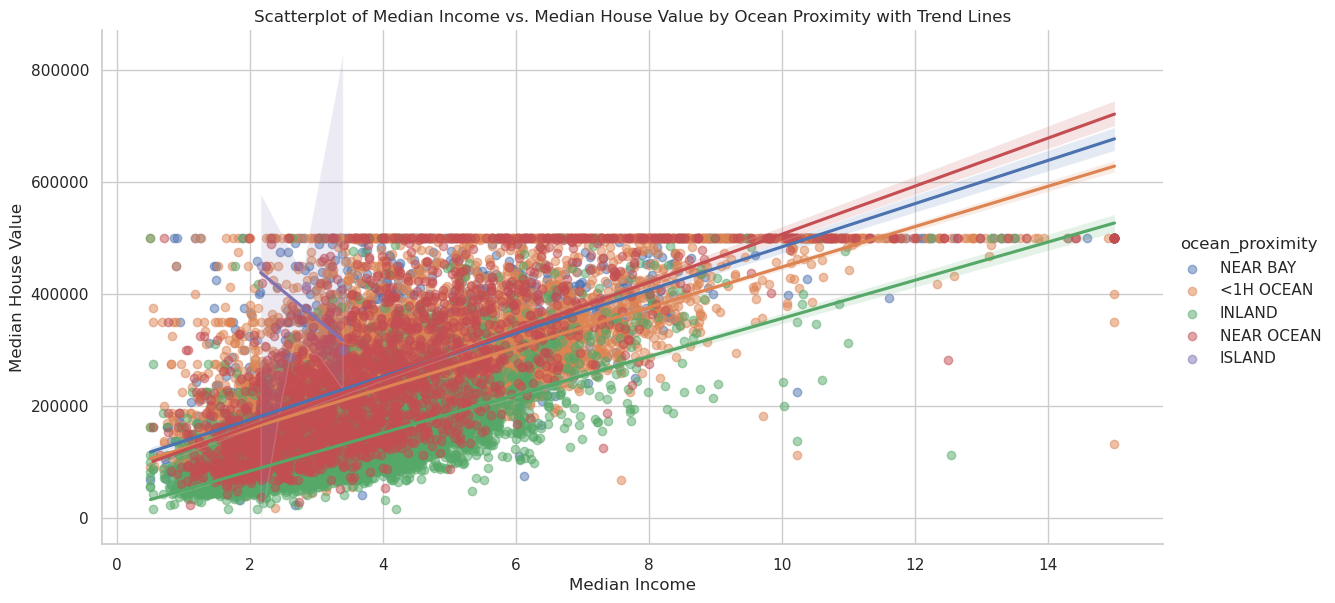

In [9]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lmplot(data=df, x='median_income', y='median_house_value', hue='ocean_proximity', height=6, aspect=2, scatter_kws={"alpha":0.5})
plt.title('Scatterplot of Median Income vs. Median House Value by Ocean Proximity with Trend Lines')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In the visualization, I observe a scatterplot that brilliantly illustrates the relationship between median income, median house value, and their dependence on ocean proximity. The use of different colors representing distinct categories of ocean proximity, such as "NEAR BAY," "INLAND," "NEAR OCEAN," and "ISLAND," provides a clear distinction of property locations. The trend lines for each category reveal crucial insights. We see a consistent positive correlation between median income and median house value across all ocean proximity categories. This aligns with our main message, highlighting the significance of income in influencing property values. Moreover, the varying slopes of the trend lines for different ocean proximities underscore the relevance of location. Coastal properties consistently command higher values, emphasizing the unique appeal of living near the ocean. Overall, this visualization visually reinforces our key message that both income and ocean proximity play pivotal roles in shaping property values, setting the stage for further analysis and exploration.

## Maps and Interpretations

In [12]:
#!pip install descartes 
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
CA_county = county_df.query("STATEFP == '06'")
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
CA_county.crs
df_gdf = gpd.GeoDataFrame(df, crs = 4269, geometry="Coordinates") 
merged_df = gpd.sjoin(df_gdf, CA_county, predicate="within")

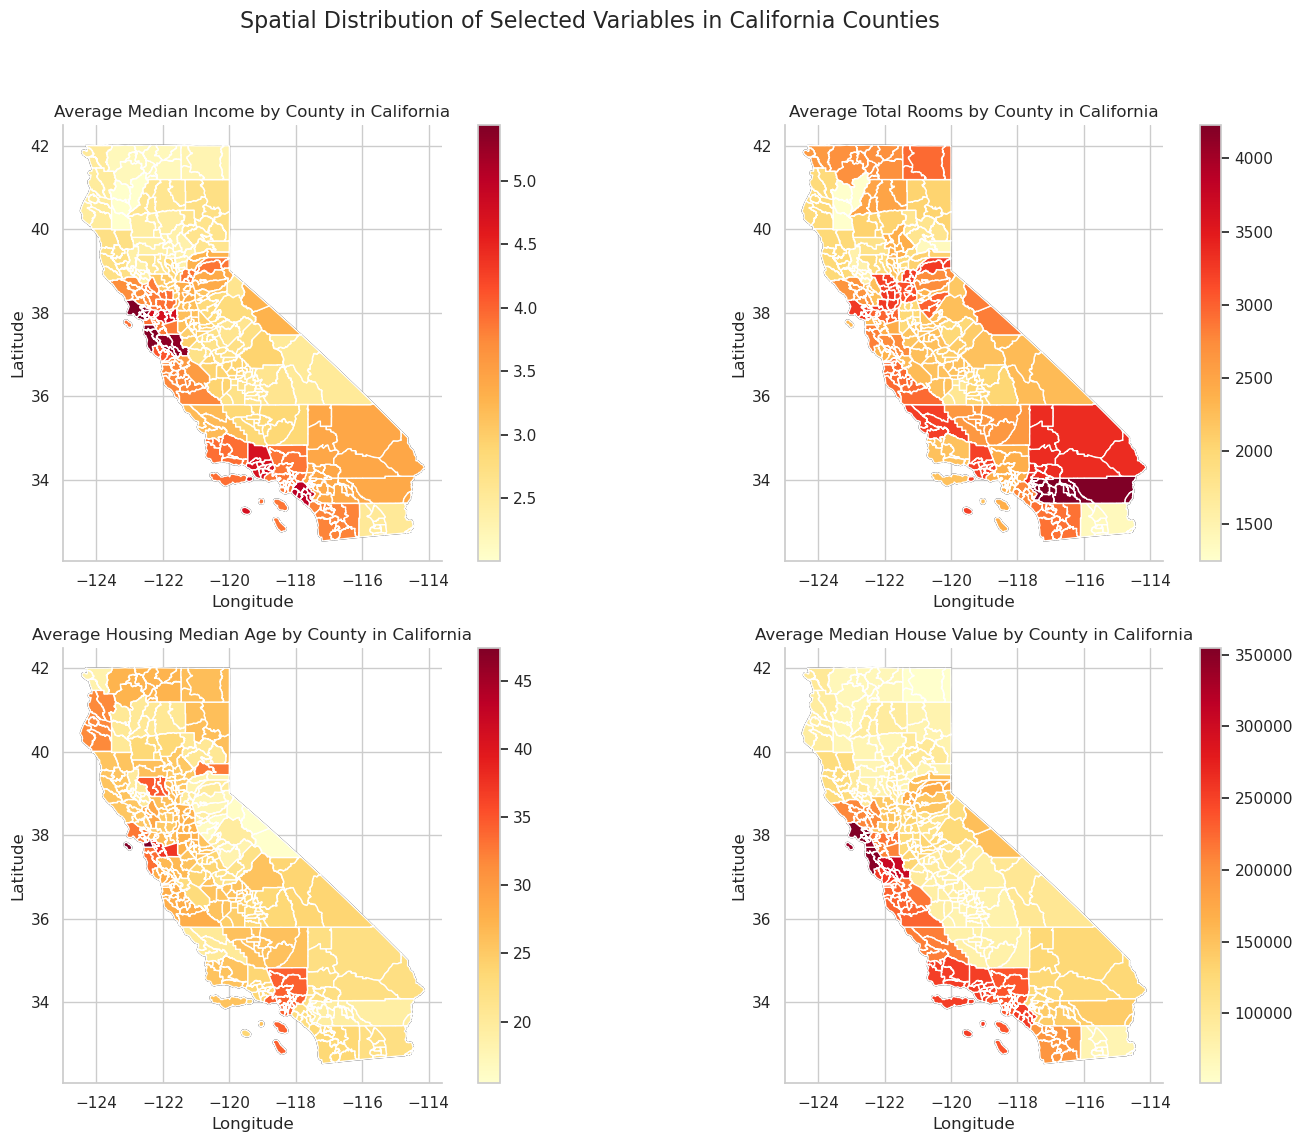

In [8]:
california = gpd.read_file('tl_2019_06_cousub.shp')

data = merged_df.copy()

variables_to_plot = ['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']
color_map = 'YlOrRd' 

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Spatial Distribution of Selected Variables in California Counties', fontsize=16)

for i, variable in enumerate(variables_to_plot):
    county_avg = data.groupby('COUNTYFP')[variable].mean()
    california_with_avg = california.merge(county_avg, left_on='COUNTYFP', right_index=True)
    ax = axes[i // 2, i % 2]
    california_with_avg.plot(ax=ax, edgecolor='black', color='white')
    scatter = california_with_avg.plot(column=variable, cmap=color_map, legend=True, ax=ax)
  
    ax.set_title(f'Average {variable.replace("_", " ").title()} by County in California')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The maps provide a comprehensive geographical perspective on the key variables. The first map, depicting median income, offers insights into regional economic prosperity. It's evident that higher-income areas are predominantly clustered along the coast and within major cities, suggesting greater economic opportunities in these regions. Conversely, rural and inland areas display lower median incomes, hinting at potential economic disparities.

The second map, showing total room counts, demonstrates a similar pattern to the median income map. Urban and coastal counties exhibit larger households, reflecting both affluence and potentially greater housing space. Notably, the Southeastern region stands out for having the highest total room counts, reinforcing the connection between economic prosperity and housing size.

The third map highlights the housing age distribution across counties. It's apparent that coastal urban and some suburban areas boast newer housing stock with lower median ages. Conversely, inland and rural counties tend to feature older housing infrastructure, suggesting the need for renovations or redevelopment in those regions.

Lastly, the fourth map underscores the critical role of location in influencing house values. Coastal counties consistently command higher property values, while inland and rural counties typically exhibit lower values. These spatial patterns align closely with our earlier analyses, reaffirming the strong association between location, income, and house values. Moreover, the consistency of relationships between variables, such as the positive correlation between median income and house value, strengthens our understanding of the housing market dynamics within the region. Outliers in these maps may signify unique economic or demographic characteristics, warranting further investigation.

# Final Project

## Merging new dataset 

I merged a new dataset on poverty rates, which adds a crucial dimension to my analysis of housing market dynamics and property values. This dataset contains information about poverty rates across different regions or counties, providing insights into the economic conditions of these areas. By incorporating poverty rate data, I can explore how income disparities and socioeconomic factors influence housing values. This additional information allows for a more comprehensive understanding of the relationship between income, poverty, and housing market trends. 

In [ ]:
#!pip install openpyxl
excel_file_path = 'povertyrates1989-1999.xls'
poverty_df = pd.read_excel(excel_file_path)
CA_poverty = poverty_df.query("STABR == 'CA'")
CA_poverty.loc[:, 'FIPS'] = CA_poverty['FIPS'].astype(str).apply(lambda x: x.zfill(5))
merged_df_2 = merged_df.merge(CA_poverty, left_on='GEOID', right_on='FIPS', how='inner')

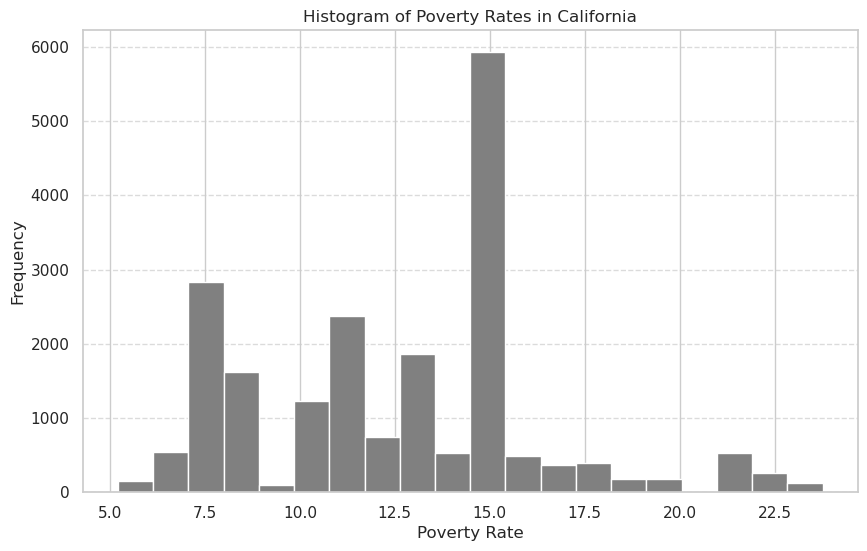

In [14]:
poverty_rates = merged_df_2['Poverty rate 1989']
plt.figure(figsize=(10, 6))
plt.hist(poverty_rates, bins=20, color='gray', edgecolor='white')
plt.xlabel('Poverty Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Poverty Rates in California')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram appears to be right-skewed, meaning that there are more regions with lower poverty rates than with higher poverty rates. This suggests that the majority of regions in California tend to have relatively lower poverty rates. However, the histogram displays a prominent peak around a poverty rate of 15.0. This peak indicates that there is a substantial number of regions or areas within California where the poverty rate hovers around this specific value. The histogram's right tail extends further to the right, indicating the presence of regions with relatively higher poverty rates. This distribution is relevant to my project as it adds another layer of socioeconomic context when analyzing the factors affecting housing values. Regions with higher poverty rates may exhibit distinct housing market dynamics compared to those with lower poverty rates.

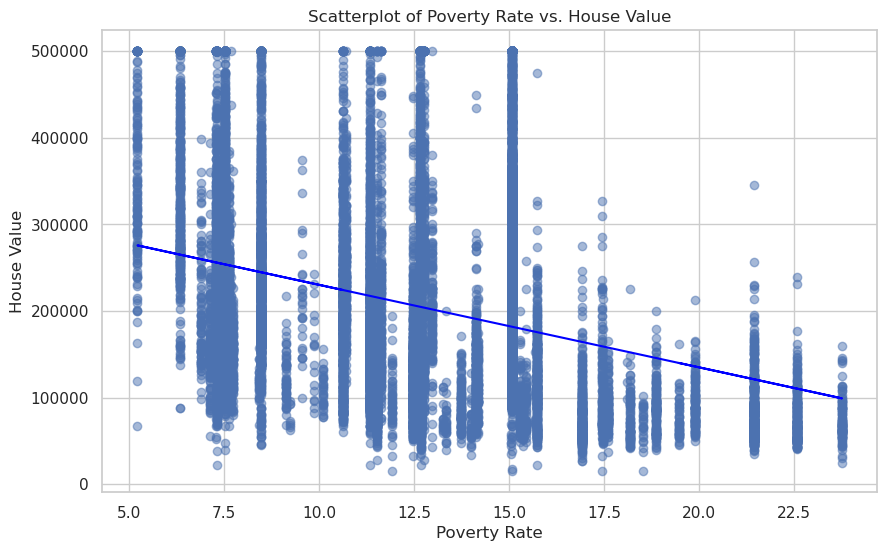

In [15]:
import numpy as np
from scipy.stats import linregress
poverty_rate = merged_df_2['Poverty rate 1989']
house_value = merged_df_2['median_house_value']
plt.figure(figsize=(10, 6))
plt.scatter(poverty_rate, house_value, alpha=0.5)
slope, intercept, r_value, p_value, std_err = linregress(poverty_rate, house_value)
x = np.array(poverty_rate)
plt.plot(x, intercept + slope * x, color='blue', label='Trend Line')
plt.title('Scatterplot of Poverty Rate vs. House Value')
plt.xlabel('Poverty Rate')
plt.ylabel('House Value')
plt.grid(True)
plt.show()

In the scatterplot of Poverty Rate vs. House Value, the presence of a downward-sloping trend line suggests a negative correlation between these two variables. Specifically, as the poverty rate in a given area increases, the median house values tend to decrease. In other words, areas with higher poverty rates generally exhibit lower house values. This observation implies that socioeconomic factors related to poverty have a discernible impact on housing prices in the studied areas. It is important to note that while this negative correlation is evident, other variables or factors not considered in this analysis may also contribute to variations in house values. I will do further exploration and statistical analysis to study the factors that influnence house values.

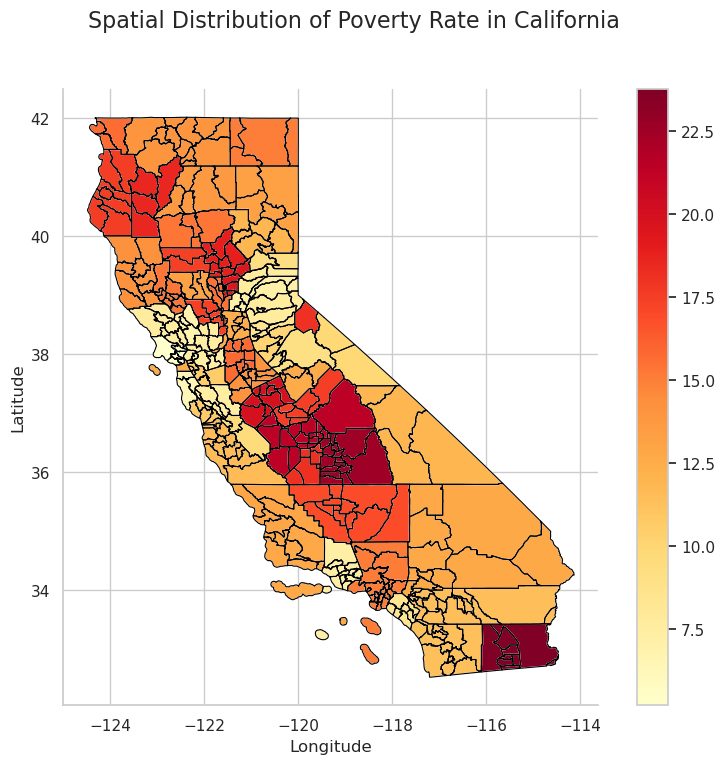

In [16]:
california = gpd.read_file('tl_2019_06_cousub.shp')
data = merged_df_2.copy()
variable_to_plot = 'Poverty rate 1989'  
color_map = 'YlOrRd'  
fig, ax = plt.subplots(figsize=(10, 8))
fig.suptitle(f'Spatial Distribution of Poverty Rate in California', fontsize=16)
county_avg = data.groupby('COUNTYFP')[variable_to_plot].mean()
california_with_avg = california.merge(county_avg, left_on='COUNTYFP', right_index=True)
california.boundary.plot(ax=ax, linewidth=0.8, color='black')
scatter = california_with_avg.plot(column=variable_to_plot, cmap=color_map, legend=True, ax=ax)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

The map displaying poverty rates highlights a concentration of higher rates of poverty in inland and rural areas of California. This concentration is in contrast to the income map, which showed higher median incomes along the coast and in major cities. The elevated poverty rates in inland regions may be indicative of economic disparities, as these areas often have fewer economic opportunities and resources compared to urban and coastal areas. While coastal and urban counties generally had higher median incomes, this map highlights that poverty rates vary more widely across California. Some urban and coastal counties still exhibit lower poverty rates, aligning with higher median incomes, but there is greater variability in poverty rates within and between rural and inland counties. This contrast emphasizes the complexity of socioeconomic conditions within the state. While income is a crucial factor influencing housing markets, it's not the sole determinant. 

## OLS Regression

In my project, I determined the dependent variable (median_house_value), and now I will explain the  economic relationships between my Y and Xs one by one.  

It is plausible to assume a linear relationship between income and house value. According to economic theory, as individuals or households earn higher incomes, they tend to have more purchasing power, which could lead to them affording more expensive houses. However, this relationship may not be perfectly linear, as higher incomes might not always lead to proportionally higher house values, especially in markets with varying levels of demand and supply.

The relationship between total rooms and house value may not be strictly linear. Initially, as the number of rooms in a house increases, its value may rise due to increased space and functionality. However, there may be diminishing returns; at some point, adding more rooms may not significantly increase the house's value, especially if those rooms are not efficiently utilized or if they make the house overly large compared to neighboring properties.

The relationship between house age and house value can also be non-linear. Older homes may have historical or architectural value that drives up their prices, but they may also require more maintenance or renovations, which could reduce their value. Newer homes may be in demand for their modern features and lower maintenance needs. Thus, there might be a non-monotonic relationship between house age and house value.

Ocean proximity is a categorical variable representing the proximity of the house to the ocean. The relationship between house value and it is likely non-linear. Houses near the ocean (e.g., "NEAR BAY" or "NEAR OCEAN") may command higher prices due to the desirable location and views. However, the relationship may not be strictly linear, as there can be significant price variations even among houses in the same category based on factors like exact location, view quality, and property size.

In summary, these independent variables align with economic theories. it's essential to recognize that these relationships may not be strictly linear, and other factors may also play a role in determining house prices. Therefore, next step I will run regressions based on these variables and capture the complexity of these relationships more accurately.

### Regression Table 1

Model:

$$\log(\text{median_house_value}) = \beta_0 + \beta_1 \cdot \text{median_income} + \beta_2 \cdot \text{housing_median_age} + \beta_3 \cdot \text{median_income} \cdot \text{ocean_proximity_INLAND} + \beta_4 \cdot \text{ocean_proximity_NEAR BAY} + \beta_5 \cdot \text{ocean_proximity_NEAR OCEAN} + \beta_6 \cdot \text{ocean_proximity_INLAND} + \beta_7 \cdot \text{ocean_proximity_ISLAND} + \epsilon$$

In [20]:
#!pip install stargazer
import numpy as np
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from IPython.core.display import HTML

df = pd.read_csv('housing.csv') 
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df['interaction_income_inland'] = df['median_income'] * df['ocean_proximity_INLAND']
df['log_median_house_value'] = np.log(df['median_house_value'])

X1 = df[['ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND']]
X2 = df[['median_income', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND']]
X3 = df[['median_income', 'housing_median_age', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND']]
X4 = df[['median_income', 'housing_median_age', 'interaction_income_inland', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND']]
Y = df['log_median_house_value'] 

X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)
X4 = sm.add_constant(X4)

model1 = sm.OLS(Y, X1)
model2 = sm.OLS(Y, X2)
model3 = sm.OLS(Y, X3)
model4 = sm.OLS(Y, X4)

results1 = model1.fit()
results2 = model2.fit()
results3 = model3.fit()
results4 = model4.fit()

stargazer = Stargazer([results1, results2, results3, results4])
stargazer.title("Log-Transformed Regression Models")
stargazer.custom_columns(["Model 1", "Model 2", "Model 3", "Model 4"], [1, 1, 1, 1])  
stargazer.show_degrees_of_freedom(False)  
HTML(stargazer.render_html())

In this table, I progressively added variables to each model to investigate their impact on house values. The constant term (const) represents the estimated log median house value when all other independent variables are zero. It varies slightly across models but remains statistically significant. median_income consistently has a positive and significant coefficient in all models, suggesting that higher median incomes are associated with higher log median house values. The coefficients for ocean_proximity indicators vary across models but generally indicate that certain locations, such as being near the bay, are associated with higher log median house values. housing_median_age remains consistently positive but with very small coefficients. The interaction term, "interaction_income_inland", is introduced in Model 4, suggesting that the relationship between income and house values varies depending on proximity to inland areas, and the coefficient is positive.

I chose to run these regressions because: In Model 1, I started with a baseline model that included only the categorical variable "ocean_proximity", since different areas often have distinct value patterns. Model 2 introduced the variable "median_income" to examine how the income level of an area's residents correlates with median house values. This economic rationale is based on the common understanding that areas with higher average incomes tend to have higher property values due to increased purchasing power. Model 3 expanded the analysis by incorporating "housing_median_age," which may also affect property values. Model 4 included the interaction term to account for the possibility that the relationship between income and house values differs depending on the proximity of properties to inland areas. This interaction captures the economic intuition that the impact of income on house values may vary in different geographical contexts.

From this table, I would choose Model 4 as the preferred specification. With an adjusted R-squared of 0.628, Model 4 explains a substantial portion of the variance in log-transformed house values, indicating that it provides a reasonably good fit to the data. Also, the inclusion of interaction_income_inland acknowledges the economic intuition that the impact of income on house values may differ depending on whether the property is inland or near the coast.

### Regression Table 2

Model:

$$\log(\text{median_house_value}) = \beta_0 + \beta_1 \cdot \text{median_income} + \beta_2 \cdot \text{housing_median_age} + \beta_3 \cdot \text{total_rooms} + \beta_4 \cdot \text{ocean_proximity_NEAR BAY} + \beta_5 \cdot \text{ocean_proximity_NEAR OCEAN} + \beta_6 \cdot \text{ocean_proximity_INLAND} + \beta_7 \cdot \text{ocean_proximity_ISLAND} + \epsilon$$


In [21]:
df = pd.read_csv('housing.csv') 
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
df['log_median_house_value'] = np.log(df['median_house_value'])

X5 = df[['median_income']]
X6 = df[['median_income', 'housing_median_age']]
X7 = df[['median_income', 'housing_median_age', 'total_rooms']]
X8 = df[['median_income', 'housing_median_age', 'total_rooms', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND']]

X5 = sm.add_constant(X5)
X6 = sm.add_constant(X6)
X7 = sm.add_constant(X7)
X8 = sm.add_constant(X8)

model5 = sm.OLS(df['log_median_house_value'], X5).fit()
model6 = sm.OLS(df['log_median_house_value'], X6).fit()
model7 = sm.OLS(df['log_median_house_value'], X7).fit()
model8 = sm.OLS(df['log_median_house_value'], X8).fit()

stargazer = Stargazer([model5, model6, model7, model8])
stargazer.title("Log-Transformed Regression Models")
stargazer.custom_columns(["Model 5", "Model 6", "Model 7", "Model 8"], [1, 1, 1, 1])
stargazer.show_degrees_of_freedom(False)

HTML(stargazer.render_html())

In Model 5, where only median income is considered, a positive coefficient of 0.197 indicates that higher median income is associated with higher log-transformed median house values. Model 6 expands on this by introducing housing median age as a predictor, with a coefficient of 0.008, suggesting that older housing median age is linked to slightly higher log-transformed house values. Model 7 further incorporates total rooms, but the close-to-zero coefficient implies that total rooms might have a negligible impact. Model 8, the most comprehensive, accounts for ocean proximity as well. Interestingly, the coefficients associated with ocean proximity variables indicate that being located "Inland" is negatively correlated with log-transformed house values, while being on an "Island" has a positive effect. I chose to run the regressions because the variabels all have an impact on house value and I want to investigate their relationships. Ultimately, the choice of model should consider the trade-off between predictive accuracy and model complexity, with Model 8 showing the highest R-squared and including various predictors for a more nuanced understanding of the underlying relationships. 

To assess the performance of my regressions, the first measure is comparing their Adjusted R-squared. It penalizes the inclusion of irrelevant predictors and helps prevent overfitting. A higher adjusted R-squared indicates a better balance between model complexity and goodness of fit.

Another measure is comparing their Residual Standard Error. RSE measures the standard deviation of the residuals (the differences between observed and predicted values). It provides an estimate of the average magnitude of prediction errors. Smaller RSE values indicate a better fit, which means the model's predictions are closer to the actual values.

Also,  I compared the coefficients. Positive coefficients imply a positive relationship with the dependent variable, while negative coefficients imply a negative relationship. The magnitude indicates the strength of the relationship. Individual p-values associated with each coefficient estimate test the null hypothesis that the corresponding predictor has no effect on the dependent variable. Low p-values suggest that the predictor variables are statistically significant in explaining the dependent variable. However, in these regressions, p-values are hard to compare. I mainly used other measures.

Finally, my preferred specification is Model 4. It has the largest adjusted R-squared of 0.628 and lowest RSE of 0.347. It explains a substantial portion of the variance in log-transformed house values, indicating that it provides a reasonably good fit to the data. Also it strikes a balance between considering income, age of housing, and geographical factors. These variables are well-grounded in economic theory.

Here is the model:

$$\log(\text{median_house_value}) = 11.591 + 0.169 \cdot \text{median_income} + 0.002 \cdot \text{housing_median_age} + 0.088 \cdot \text{interaction_income_inland} + 0.039 \cdot \text{ocean_proximity_NEAR BAY} + 0.037 \cdot \text{ocean_proximity_NEAR OCEAN} - 0.505 \cdot \text{ocean_proximity_INLAND} + 0.731 \cdot \text{ocean_proximity_ISLAND} + \epsilon$$

From the regression results, I have understood how the dependent variable change with the X variables. The regression results help answer the research question by identifying which combination of predictors provides the most effective model for explaining variations in log-transformed median house values.

### Causal Analysis

From the regressions, I observed that there is a strong correlation between house value and income. However, I should not simply conclude it,  but try to identify a suitable endogenous factor that can simultaneously affect both the dependent variable (median_house_value) and the main independent variable (median_income).  In econometric analysis, such a variable is often referred to as an "instrument" in the context of instrumental variables (IV) regression.

One potential endogenous factor is distance to employment centers. Proximity to major employment centers can affect both income levels and housing prices. If distance is exogenous (not influenced by omitted variables), it could be used as an instrument.

Unexpected economic shocks, such as the closure of a major employer or the opening of a large new business, can also influence both income and housing values.

Also, if there have been significant policy changes related to income, housing, or the local economy that are unlikely to be influenced by omitted variables, these policy changes could serve as instruments. For example, a sudden change in minimum wage laws that affects income levels without being influenced by housing conditions.

## Machine Learning

Objective Function:

$$\text{min} \left[\frac{1}{n} \sum_{i=1}^{n} (\text{log_median_house_value}_i - \hat{\text{log_median_house_value}}_i)^2 \right]$$

For each observation in the dataset, the model makes a prediction for the log-transformed median house value ($\hat{\text{log_median_house_value}}$). The objective is to assess how close these predicted values are to the actual log-transformed median house values ($\text{log_median_house_value}$). To do this, we calculate the squared difference between each prediction and its corresponding actual value. These squared differences are then averaged across all observations in the dataset. The resulting average squared difference, which is the MSE, tells us on average how much the model's predictions deviate from the actual values. In other words, it quantifies the "error" of the model's predictions. A lower MSE indicates that the model's predictions are closer to the actual values, while a higher MSE suggests larger prediction errors. In simpler terms, the objective function aims to build a regression tree that makes predictions as close as possible to the actual values by minimizing the average squared differences between predicted and actual values for all data points.

Regularization parameters are used to control the complexity of the tree and prevent overfitting. Overfitting occurs when a tree is too complex and fits the training data extremely well but fails to generalize to unseen data, leading to poor predictive performance. They help strike a balance between model complexity and predictive accuracy. One parameter is maximum depth (max_depth), which limits the maximum depth or levels of the tree. A smaller max_depth value creates a shallower tree with fewer splits, reducing its complexity. Conversely, a larger max_depth value allows the tree to grow deeper, potentially capturing more details in the training data. However, a very deep tree is more prone to overfitting. Another parameter is minimum smples per leaf (min_samples_leaf), which specifies the minimum number of samples required in a leaf node. Leaf nodes with fewer samples tend to capture noise in the data and lead to overfitting. Setting a higher min_samples_leaf value enforces a constraint on the minimum number of samples in a leaf node, encouraging more generalized splits. 

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
np.random.seed(42)
df['log_median_house_value'] = np.log(df['median_house_value'])
X = df[['median_income', 'total_rooms', 'housing_median_age', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND']]
y = df['log_median_house_value']
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = sqft_tree.predict(X)

### Regression Tree

Mean Squared Error: 0.12402819946600713


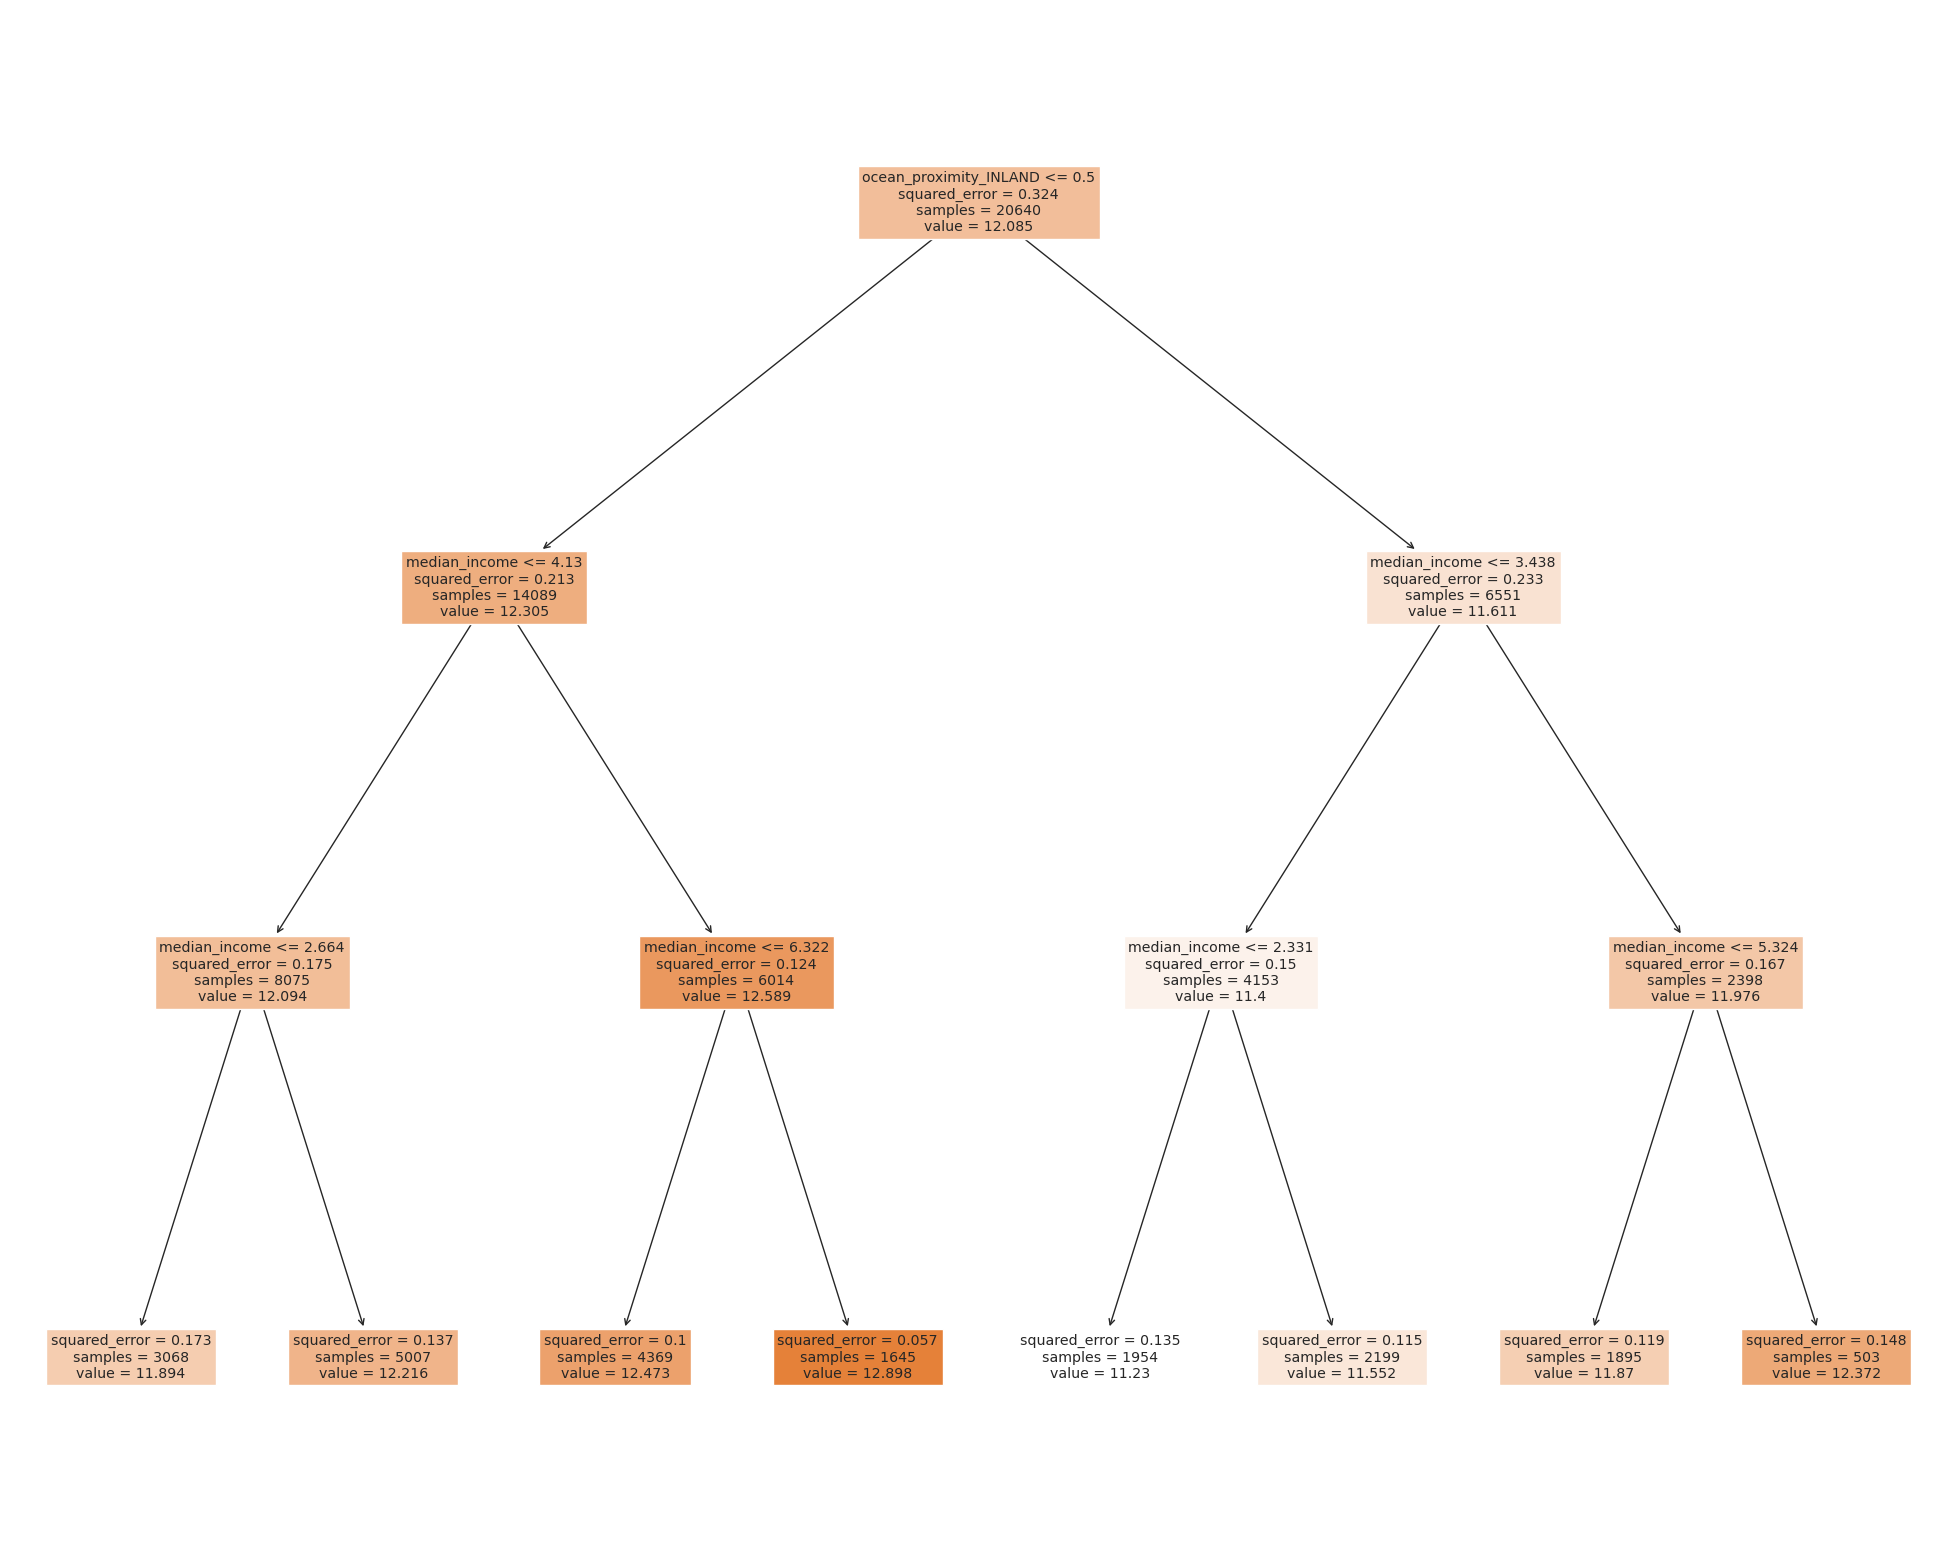

In [29]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

In this case, the MSE represents the average squared difference between the actual logarithmic values of median house prices and the predicted values produced by the decision tree model. The MSE equals 0.12402819946600713, indicating a good model performance in terms of prediction accuracy. The structure of the decision tree is also noteworthy. In this case, the tree is constrained to have a maximum depth of 3 levels. Each level represents a decision point where the model splits the data based on one of the predictor variables. These variables here are ocean_proximity and median_income. The nodes at the deepest level are referred to as leaf nodes, and they contain the predicted values.

My error of prediction, often quantified using metrics like MSE, measures the average squared difference between the predicted values and the actual values in the dataset. A lower MSE indicates better prediction accuracy. The MSE can help identify potential issues with the model's fit. If the MSE is very low on the training data but high on new, unseen data, it could be a sign of overfitting, where the model has learned the training data too closely and struggles to generalize. In my research, the MSE allows for the comparison of different models.

### Comparing Results

Linear regression offers a straightforward interpretation of the relationships between variables. It has the RSE of 0.347. In this case, it helps us understand how median income, total rooms, housing median age, and ocean proximity impact the logarithm of median house values. However, it might struggle to capture complex, non-linear patterns in the data. Regression trees, on the other hand, are non-linear and non-parametric models. They can capture intricate relationships in the data that linear regression might miss. For instance, a tree can identify interaction effects and non-linearities in the impact of predictors on the log of median house values. The MSE equals 0.124. The lower MSE from the regression tree suggests that the tree model can better explain the variance in the data and capture complex interactions between variables. It may reveal insights such as specific income or room number thresholds that affect house values, which OLS might not uncover. In summary, the regression tree model extracts additional information because it is more flexible in capturing non-linear relationships and interactions within the data.

0.015915823579778887

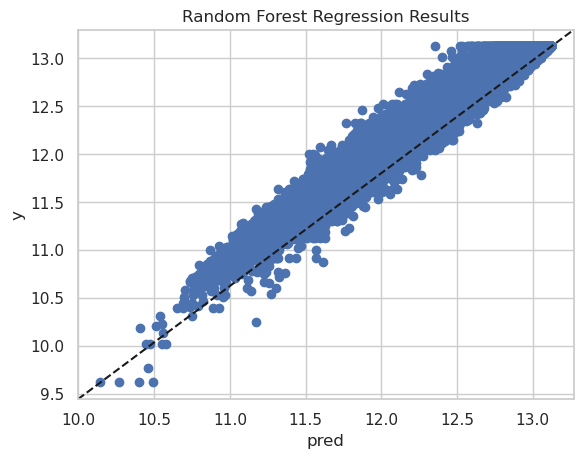

In [30]:
regr1 = RandomForestRegressor(max_features= 18, random_state=1) 
regr1.fit(X, y)
pred = regr1.predict(X)
plt.scatter(pred, y, label='log price')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y')
plt.title('Random Forest Regression Results')
mean_squared_error(y, pred)

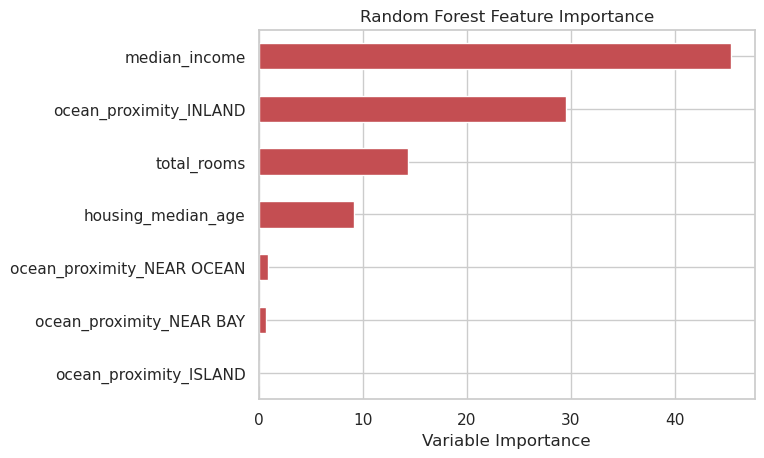

In [31]:
regr2 = RandomForestRegressor(max_features=5, random_state=1)
regr2.fit(X, y)
pred = regr2.predict(X)
mean_squared_error(y, pred)
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.title('Random Forest Feature Importance')
plt.gca().legend_ = None

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(1,20)}
clf = GridSearchCV(tree.DecisionTreeRegressor(), parameters, cv=5) # 5-fold cross-validation
clf.fit(X=X_train, y=y_train)
best_tree_model = clf.best_estimator_

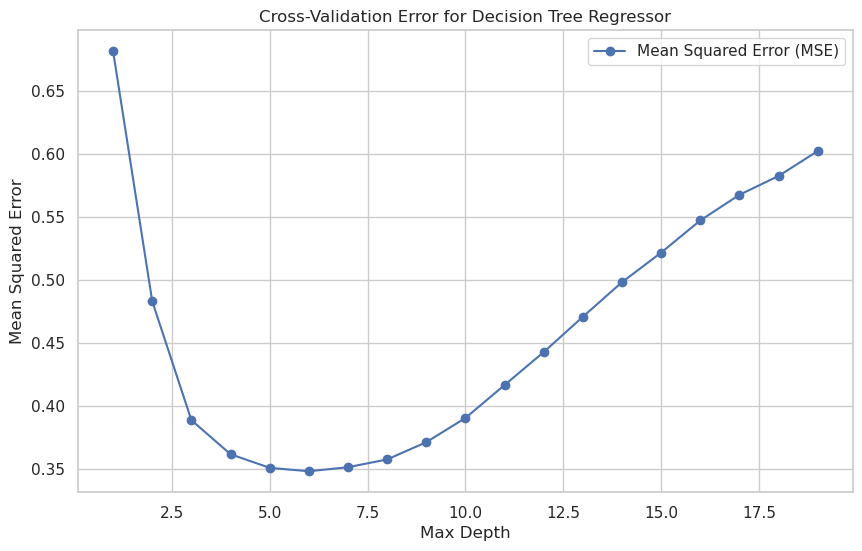

Mean Squared Error: 0.11493356352186407


In [33]:
mse_scores = 1 - clf.cv_results_['mean_test_score']
depths = parameters['max_depth']

plt.figure(figsize=(10, 6))
plt.plot(depths, mse_scores, marker='o', color='b', label='Mean Squared Error (MSE)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Cross-Validation Error for Decision Tree Regressor')
plt.legend()
plt.grid(True)
plt.show()
print('Mean Squared Error:', metrics.mean_squared_error(y_test, best_tree_model.predict(X_test)))

The Random Forest Importance Matrix provides insights into the significance of each feature in predicting the target variable (logarithm of median house values). Features with higher importance scores contribute more to the predictive accuracy of the Random Forest model. For example, from the matrix, median_income and ocean_proximity_INLAND are with the highset importance. Features with low or zero importance scores may not have a significant impact on predictions.

Cross-validation error represents how well the Decision Tree Regressor generalizes to different subsets of the dataset. The error, calculated as MSE, compares predicted values to actual values on validation subsets. It equals 0.11493356352186414, indicating that the Decision Tree Regressor generalizes well and provides accurate predictions on unseen data. Higher error suggests that the model may overfit the training data and might not perform as well on new data. Monitoring cross-validation error helps in tuning hyperparameters, such as tree depth or minimum samples per leaf, to achieve a balance between underfitting and overfitting.

## Conclusion

In conclusion, this research paper delves into the factors influencing median housing values in California using a robust dataset encompassing various housing characteristics and geographic data.    Firstly, through data visualization and regression analysis, I have observed a clear and positive relationship between income levels and house prices. Higher median incomes are consistently associated with increased housing values. This finding underscores the significance of income as a fundamental driver of housing prices in California. Furthermore, my analysis has revealed intriguing nuances in the relationship between housing age and house values. There is a slight positive correlation between them. Also, while no straightforward linear association was evident, I discerned that additional rooms within a property tend to be linked to higher housing values. This underscores the importance of internal property characteristics in shaping housing prices. Additionally, proximity to the ocean or bay emerged as a substantial factor affecting housing values. Housing units located near these bodies of water generally command higher prices compared to those situated further inland. This geographical aspect plays a pivotal role in the California housing market dynamics.

The inclusion of geospatial maps in our study has provided an enhanced understanding of how median house values and selected independent variables are distributed across California counties. Nevertheless, it is imperative to acknowledge the limitations of this research. My analysis is grounded in observational data, and therefore, it does not establish causation. Furthermore, the intricate landscape of housing prices is influenced by a myriad of unobserved variables, including macroeconomic factors, which were not within the scope of this study. Future research endeavors should explore more intricate models that encompass a broader spectrum of covariates to gain a more comprehensive understanding of housing prices.

All in all, this research offers a comprehensive framework for studying and interpreting housing market dynamics. By combining statistical analysis, visualization, geospatial mapping, regression and machine learning analysis, I have strived to provide a holistic understanding of the factors shaping housing prices, which can be extended to inform decision-making processes in both the real estate industry and public policy domain.

## References

[1] Manjula, R., Jain, S., Srivastava, S., & Kher, P. R. (2017). Real estate value prediction using multivariate regression models. IOP Conference Series: Materials Science and Engineering, 263, 042098.

[2] Li, L., & Chu, K.-H. (2017). Prediction of real estate price variation based on economic parameters. Department of Financial Management, Business School, Nankai University.

[3] Capozza, D. R., Hendershott, P. H., Mack, C., & Mayer, C. J. (2002). Determinants of Real House Price Dynamics (NBER Working Paper No. 9262). National Bureau of Economic Research. 

[4] Burges, C. J. C. (2010). Dimension reduction: A guided tour. Foundational Trends in Machine Learning, 2(4), 275-365.

[5] Santhanam, T., & Padmavathi, M. S. (2015, January). Application of k-means and genetic algorithms for dimension reduction by integrating SVM for diabetes diagnosis. Procedia Computer Science, 47, 76-83.

[6] Kumar, M., Sharma, A., & Agarwal, S. (2014, August). Clinical decision support system for diabetes disease diagnosis using optimized neural network. In Proceedings of the Students Conference IEEE Engineering Systems (SCES) (Vol. 3, pp. 254-261).